# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:https://www.kaggle.com/datasets/aishahakami/call-of-duty-players

Import the necessary libraries and create your dataframe(s).

In [1]:
#Importing pandas and numpy in order to read dataset and run basic descriptive statistics
import pandas as pd
import numpy as np
import statistics as stats
#Improting matplotlib and seaborn to create visuals for EDA and data cleaning
import matplotlib.pyplot as plt
import seaborn as sns

#Reading CSV into jupyter and creating Call of Duty dataframe -- 'cod_df'
cod_df=pd.read_csv('~/Library/Mobile Documents/com~apple~CloudDocs/LC_DA/Final_Project/cod.csv')
cod_df.shape

(1558, 19)

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [2]:
#Checking for missing data percentages
for col in cod_df.columns:
    pct_missing = np.mean(cod_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
#No missing data - YAY!!!

name - 0%
wins - 0%
kills - 0%
kdRatio - 0%
killstreak - 0%
level - 0%
losses - 0%
prestige - 0%
hits - 0%
timePlayed - 0%
headshots - 0%
averageTime - 0%
gamesPlayed - 0%
assists - 0%
misses - 0%
xp - 0%
scorePerMinute - 0%
shots - 0%
deaths - 0%


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

<Axes: >

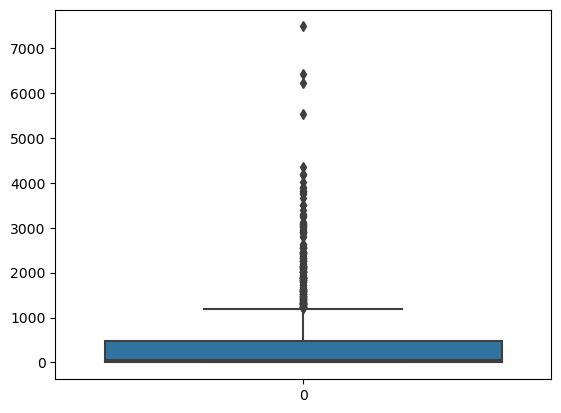

In [3]:
#I found that my dependent/outcome variables were skewed due to extreme outliers
sns.boxplot(data=cod_df['timePlayed'])
#Total time played has outliers

<Axes: >

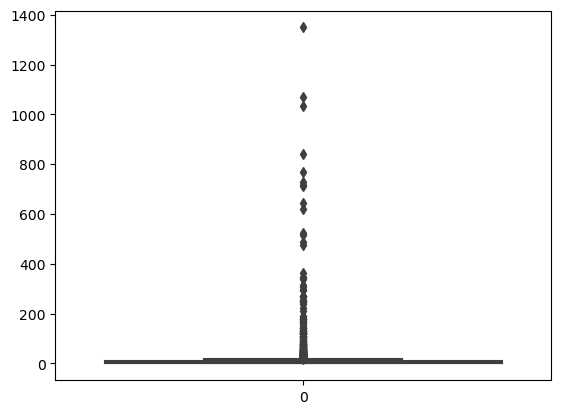

In [4]:
sns.boxplot(data=cod_df['averageTime'])
#Average time played has outliers

In [5]:
timePlayed_list = cod_df['timePlayed']
timePlayed_sd = stats.stdev(timePlayed_list)
timePlayed_sd

786.1824985284558

In [6]:
timePlayed_list = cod_df['averageTime']
averageTime_sd = stats.stdev(timePlayed_list)
averageTime_sd

82.63999950291102

In [7]:
for index, row in cod_df.iterrows():
    if row['timePlayed'] > (timePlayed_sd*2):
        cod_df.drop(index, inplace=True)
cod_df.shape

(1424, 19)

<Axes: >

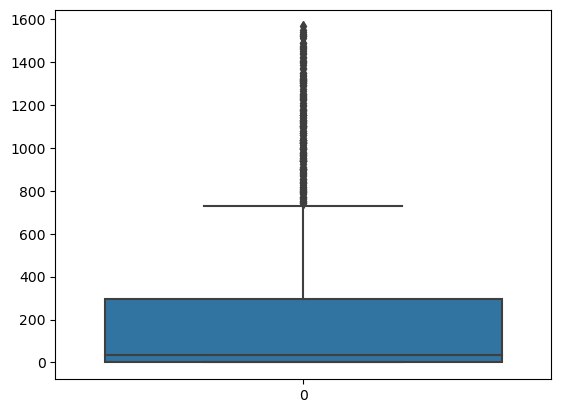

In [8]:
sns.boxplot(data=cod_df['timePlayed'])
#The data is still skewed, but this looks better. May have to consider non-parametric tests.

In [9]:
for index, row in cod_df.iterrows():
    if row['averageTime'] > (averageTime_sd*2):
        cod_df.drop(index, inplace=True)
cod_df.shape

(1383, 19)

<Axes: >

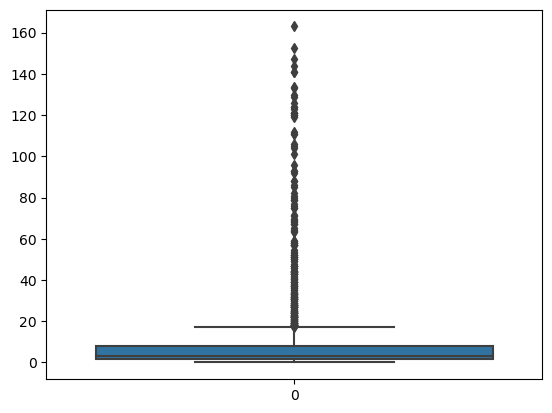

In [10]:
sns.boxplot(data=cod_df['averageTime'])
#The data is still skewed, but this looks better. May have to consider non-parametric tests.

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [11]:
#There are duplicate rows of information which may be expected given that different users could have the same data.
#This is true for users who maybe played for very short periods of item and have low or zero scores on all variables
cod_df_dedupped = cod_df.drop('name', axis=1).drop_duplicates()

print(cod_df.shape)
print(cod_df_dedupped.shape)

(1383, 19)
(1167, 18)


In [12]:
#And this is true becayse when I check duplicate usernames, the names are unique.
cod_df['name'].describe()

count                1383
unique               1383
top       RggRt45#4697369
freq                    1
Name: name, dtype: object

In [13]:
#I will also drop coloumns for variables that are not relevant to the project (i.e., columns not related to reinforcers, punishers, and times played)
cod_df.drop(['killstreak', 'prestige', 'headshots', 'assists', 'shots'], axis=1)
cod_df.shape

(1383, 19)

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [14]:
cod_df.columns

Index(['name', 'wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses',
       'prestige', 'hits', 'timePlayed', 'headshots', 'averageTime',
       'gamesPlayed', 'assists', 'misses', 'xp', 'scorePerMinute', 'shots',
       'deaths'],
      dtype='object')

In [15]:
#I will look at the data for the other variables to check for strange or inconsistent types and values.
#I expect all the data to be integers except for 'name' which I looked at already
cod_df['wins'].describe()

count    1383.000000
mean       85.882140
std       154.565503
min         0.000000
25%         0.000000
50%         6.000000
75%       100.000000
max       862.000000
Name: wins, dtype: float64

In [16]:
cod_df['kills'].describe()

count     1383.000000
mean      2038.733912
std       4241.068619
min          0.000000
25%          2.000000
50%         81.000000
75%       1951.500000
max      30820.000000
Name: kills, dtype: float64

In [17]:
cod_df['kdRatio'].describe()

count    1383.000000
mean        0.598608
std         0.432429
min         0.000000
25%         0.184698
50%         0.657459
75%         0.932550
max         3.000000
Name: kdRatio, dtype: float64

In [18]:
cod_df['level'].describe()

count    1383.000000
mean       27.313811
std        41.442791
min         1.000000
25%         1.000000
50%         8.000000
75%        36.000000
max       201.000000
Name: level, dtype: float64

In [19]:
cod_df['losses'].describe()

count    1383.000000
mean        4.034707
std         5.665184
min         0.000000
25%         0.000000
50%         1.000000
75%         7.000000
max        50.000000
Name: losses, dtype: float64

In [20]:
cod_df['hits'].describe()

count      1383.000000
mean       5970.548084
std       13004.371034
min           0.000000
25%           0.000000
50%          94.000000
75%        5119.000000
max      103659.000000
Name: hits, dtype: float64

In [21]:
cod_df['timePlayed'].describe()

count    1383.000000
mean      220.447578
std       365.747287
min         0.000000
25%         3.000000
50%        31.000000
75%       274.000000
max      1566.000000
Name: timePlayed, dtype: float64

In [22]:
cod_df['averageTime'].describe()

count    1383.000000
mean       10.863777
std        21.997102
min         0.000000
25%         1.910580
50%         3.000000
75%         8.000000
max       163.000000
Name: averageTime, dtype: float64

In [23]:
cod_df['gamesPlayed'].describe()

count    1383.000000
mean       66.054230
std       133.652564
min         0.000000
25%         0.000000
50%         2.000000
75%        60.000000
max       934.000000
Name: gamesPlayed, dtype: float64

In [24]:
cod_df['misses'].describe()

count      1383.000000
mean      25956.746204
std       54352.325233
min           0.000000
25%           0.000000
50%         600.000000
75%       23237.000000
max      409916.000000
Name: misses, dtype: float64

In [25]:
cod_df['xp'].describe()

count    1.383000e+03
mean     4.112301e+05
std      7.850646e+05
min      0.000000e+00
25%      1.275000e+03
50%      3.519000e+04
75%      4.383805e+05
max      4.941412e+06
Name: xp, dtype: float64

In [26]:
cod_df['scorePerMinute'].describe()

count    1383.000000
mean      106.788082
std       118.920387
min         0.000000
25%         0.000000
50%        43.500000
75%       225.408449
max       413.800000
Name: scorePerMinute, dtype: float64

In [27]:
cod_df['deaths'].describe()
#All good!

count     1383.000000
mean      2135.800434
std       4238.526284
min          0.000000
25%          9.000000
50%        137.000000
75%       2266.000000
max      30797.000000
Name: deaths, dtype: float64

In [32]:
#I will create a new df and save a new csv of clean data to my computer
from pathlib import Path  
filepath = Path('~/Library/Mobile Documents/com~apple~CloudDocs/LC_DA/Git/Final_Project_Data/cod_clean.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
cod_df.to_csv(filepath)

## Summarize Your Results

Make note of your answers to the following questions.

<Br>1. Did you find all four types of dirty data in your dataset?
<Br>Missing - none
<Br>Irregular - outcomes variables were skewed, deleted outliers for timePlayed and averageTime
<Br>Unessesary - dropped columns not needed for analysis
<Br>Inconsistent - none
<Br>
<Br>2. Did the process of cleaning your data give you new insights into your dataset? 
<Br>Yes. I was surprised by the skew on the total and average time played. It suggested that my sample is not a normal distribution and I gained insights about the players that I am analyzing. Some people play a lot of Call of Duty, but most will not play much at all. I also discovered the variables gamesPlayed and scorePerMinute. I planned to look at the time a player spends in the game, but did not consdier how many new games they start. This could be a measure of time invested in the game for those who may play for shorter but more frequent sessions. I might ask myself if I care about how long they play or whether or not they pick up a controller even for a brief time. I might also want to consider score per minute as a reinforcer given that this variable reflects a rate of success versus just succesful events (i.e., win or kill). 
<Br>
<Br>3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations? 
<Br>Given the skew of the data, I will consider non-parametric tests (used for non-normally distributed data) when analyzing the statsitical relationship between variables.